In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
netflix_overall=pd.read_csv("netflix_titles.csv")
netflix_overall.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


## genre

In [28]:
netflix_overall['genre'] = netflix_overall['listed_in'].apply(lambda x: x.split(",")[0]) 
netflix_overall['genre']

0                  Documentaries
1         International TV Shows
2                 Crime TV Shows
3                     Docuseries
4         International TV Shows
                  ...           
8802                 Cult Movies
8803                    Kids' TV
8804                    Comedies
8805    Children & Family Movies
8806                      Dramas
Name: genre, Length: 8807, dtype: object

In [29]:
netflix_overall['genre'].value_counts()

Dramas                          1600
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           774
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         388
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 253
Docuseries                       221
Anime Series                     176
International Movies             128
TV Comedies                      120
Reality TV                       120
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            57
TV Action & Adventure             40
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Classic & Cult TV                 22
Anime Features                    21
Independent Movies                20
Music & Musicals                  18
T

In [30]:
netflix_overall['genre'].nunique()

36

In [31]:
netflix_overall['genre'].unique()

array(['Documentaries', 'International TV Shows', 'Crime TV Shows',
       'Docuseries', 'TV Dramas', 'Children & Family Movies', 'Dramas',
       'British TV Shows', 'Comedies', 'TV Comedies', 'Thrillers',
       'Horror Movies', "Kids' TV", 'Action & Adventure', 'Reality TV',
       'Anime Series', 'International Movies', 'Sci-Fi & Fantasy',
       'Classic Movies', 'TV Shows', 'Stand-Up Comedy',
       'TV Action & Adventure', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV', 'Anime Features', 'Romantic TV Shows',
       'Cult Movies', 'Independent Movies', 'TV Horror',
       'Spanish-Language TV Shows', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', 'TV Sci-Fi & Fantasy', 'Sports Movies'],
      dtype=object)

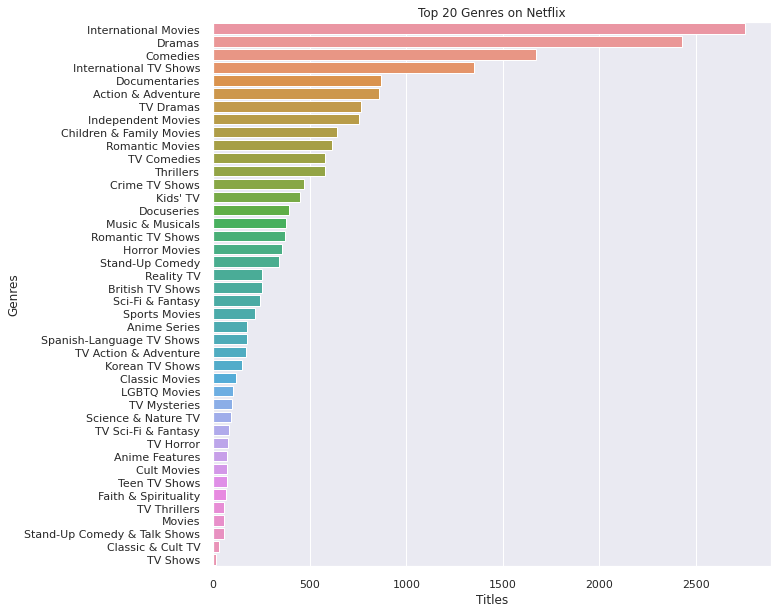

In [42]:
filtered_genres = netflix_overall.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres , order=filtered_genres.value_counts().index[:])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

## Year wise analysis



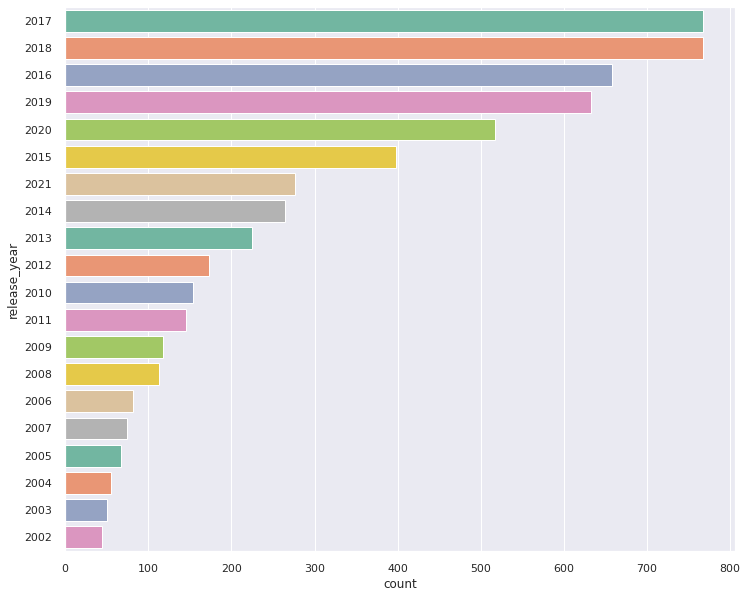

In [46]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:20])